In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/simplesentiment/products_sentiment_sample_submission.csv
/kaggle/input/simplesentiment/products_sentiment_test.tsv
/kaggle/input/simplesentiment/products_sentiment_train.tsv


In [1]:
import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer, TfidfVectorizer
from nltk.corpus import stopwords
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.utils import shuffle

In [5]:
train = pd.read_csv('/kaggle/input/simplesentiment/products_sentiment_train.tsv', names=['text', 'label'], header=0, sep='\t')
test = pd.read_csv('/kaggle/input/simplesentiment/products_sentiment_test.tsv', sep='\t')

In [6]:
X = train['text'].values
y = train['label'].values
X_test = test['text'].values

In [7]:
vectorizer = TfidfVectorizer(min_df=0.02, max_df=0.9, ngram_range=(3,12), sublinear_tf=True, analyzer='char_wb')
vectorizer.fit(np.concatenate((np.array([x[0] for x in np.array(X)]), np.array([x[0] for x in np.array(X_test)]))))

TfidfVectorizer(analyzer='char_wb', max_df=0.9, min_df=0.02,
                ngram_range=(3, 12), sublinear_tf=True)

In [8]:
svc = LinearSVC(penalty='l1', C=0.55, fit_intercept=False, dual=False, tol=1e-10, max_iter=100000)

In [9]:
cross_val_score(svc, vectorizer.transform(np.array([x[0] for x in np.array(X)])), y, cv=10).mean()

0.5918090452261306

In [10]:
vectorizer_r = CountVectorizer(ngram_range=(1, 5))
X_r = vectorizer_r.fit_transform(X)
tfidf_r = TfidfTransformer()
freq_r = tfidf_r.fit_transform(X_r)
print(X_r.shape)
print(freq_r.shape)

(1999, 98971)
(1999, 98971)


In [11]:
pca = PCA(n_components=500, svd_solver='full')
pca.fit(pd.DataFrame(freq_r.A, columns=vectorizer_r.get_feature_names()))
reduced_pd = pca.transform(pd.DataFrame(freq_r.A, columns=vectorizer_r.get_feature_names()))

In [12]:
svc_r = LinearSVC(penalty='l1', C=0.55, fit_intercept=False, dual=False, tol=1e-10, max_iter=100000)

In [14]:
score_r = cross_val_score(LinearSVC(max_iter=400, loss='hinge', C=1.9, tol=0.001, random_state=777),
                      reduced_pd, y, scoring='accuracy', cv=5).mean()
print(f"LinearSVC + PCA - {score_r}")

LinearSVC + PCA - 0.7578784461152882


In [17]:
svc.fit(vectorizer.transform(np.array([x[0] for x in np.array(X)])), y)
preds = svc.predict(vectorizer.transform(np.array([x[0] for x in np.array(X_test)])))

In [ ]:
ans = pd.DataFrame({'Id' : np.arange(0, len(preds)), 'y' : np.array(preds)})

In [ ]:
ans.to_csv('submission.csv', index=False)

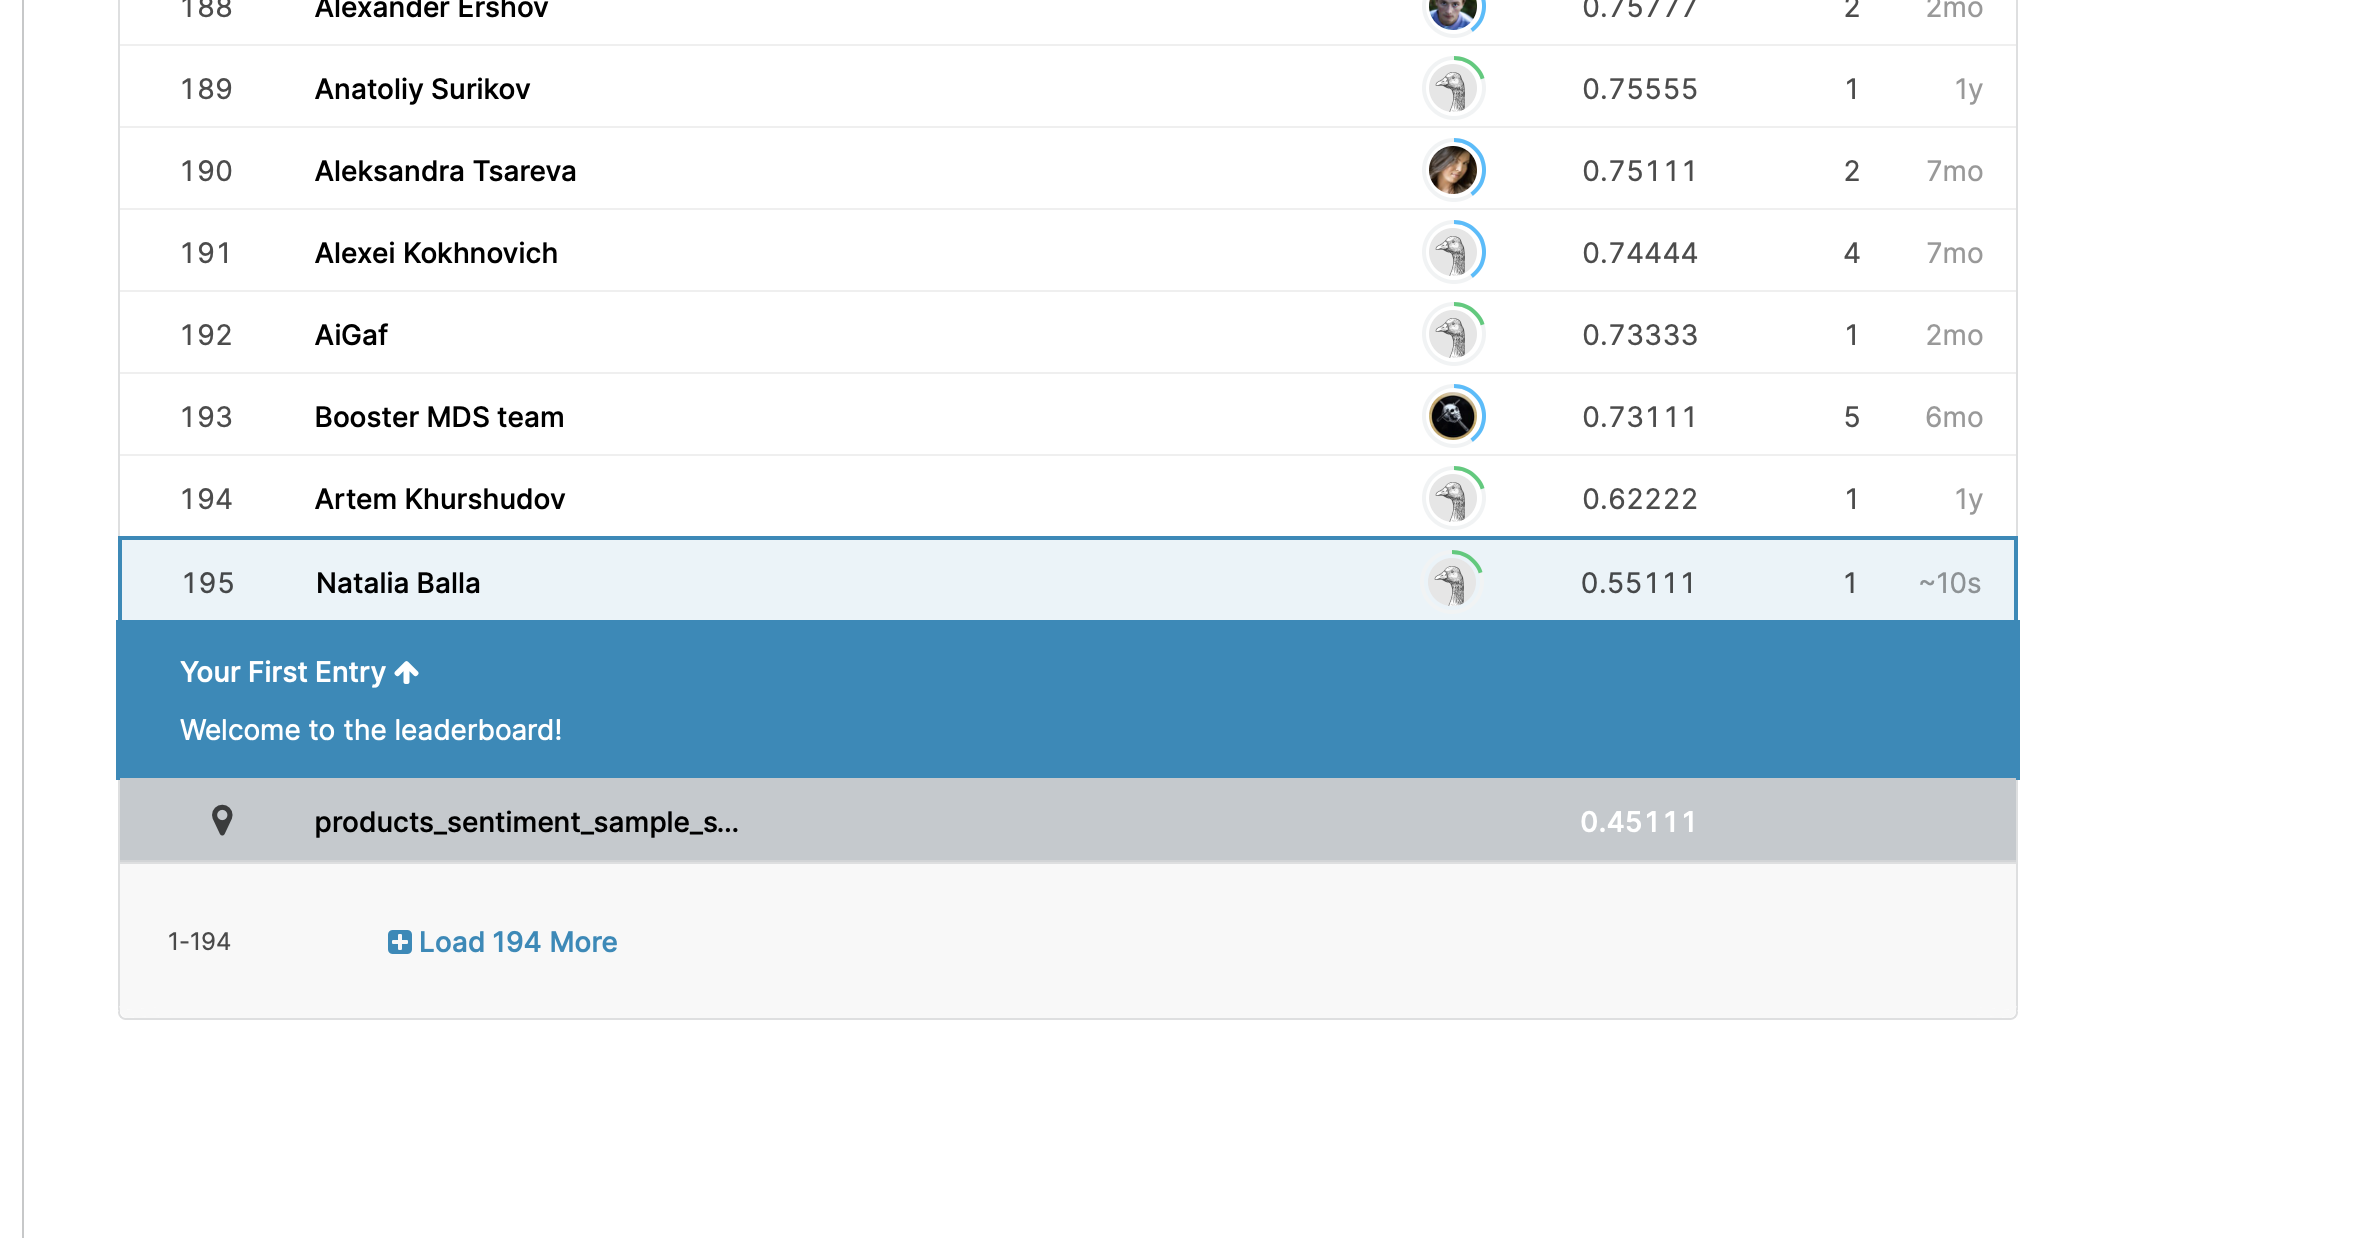

In [6]:
from IPython.display import Image
from IPython.core.display import HTML

PATH = "/Users/natashaballa/Desktop/"
Image(filename = PATH + "Screenshot1.png", width=600, height=250)